<a href="https://colab.research.google.com/github/datamarketingstudy/fastcampus_export/blob/main/01_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EA%B0%80%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail 데이터를 활용한 데이터 전처리 연습

## 전처리란?

### 데이터 전처리 개념과 대상


**데이터 전처리**는 데이터 분석을 준비하기 위한 처리의 과정으로 데이터를 가공하거나 변환하는 과정을 의미함<br>
데이터 전처리의 대상은 크게 아래와 같이 두 종류로 분류할 수 있음<br>
- 데이터 구조 전처리
- 데이터 내용 전처리


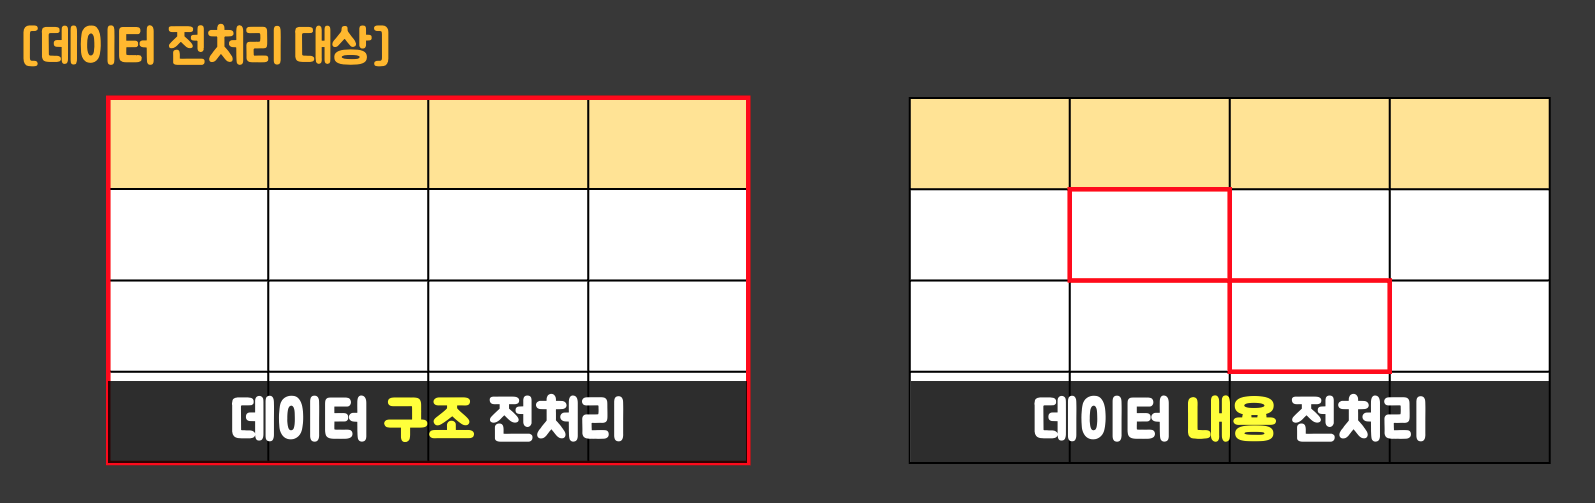

### 데이터 구조 전처리


데이터 전체를 아우르는 처리로 특정 데이터만을 뽑거나 혹은 데이터를 결합, 변환하는 처리로 특정 컬럼의 데이터 타입을 변환하는 것이 대표적인 예


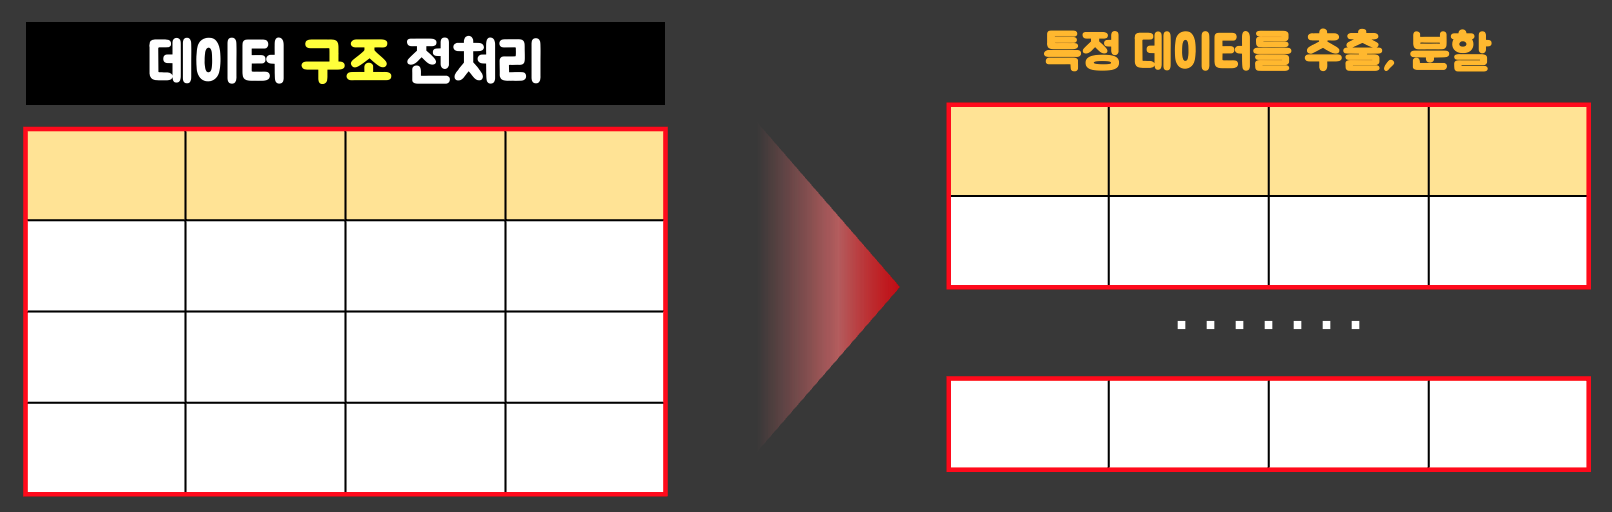

### 데이터 내용 전처리


데이터 전체가 아닌 행 혹은 데이터 값(레코드) 등을 처리하며, 조건에 따라 데이터 전처리를 실행<br>
<br>
데이터 내용 전처리 대표 사례<br>
- 생년월일 데이터에서 나이를 추출
- 나이 데이터를 연령대로 그룹핑(범주형 데이터 생성)
- 일자를 연월 또는 요일로 변환


## 실습 데이터 설명


실습에 활용한 **Retail Case Study Data**는 소매 업체의 거래 내역, 고객 정보, 카테고리 정보를 담고 있습니다.<br>
<br>
**[데이터 스키마]**
- **Customer** : 고객의 인적 정보를 담고 있는 데이터 (고객id, 생년월일, 성별, 거주지 코드)
    - customer_id : 고객id (고객 식별 값, 보통 고유함)
    - DOB : 고객 생년월일 (날짜 형식 데이터)
    - Gender : 고객 성별 (M : 남성 / F : 여성)
    - city_code : 거주지 코드 (1부터 10까지 숫자로 구성)
- **Transactions** : 거래 내역 데이터 (고객id, 주문id, 거래 일자, 카테고리 콛, 거래 금액 등)
    - transaction_id : 거래id (거래 발생 시 부여되는 번호)
    - cust_id : 고객id (Customer의 customer_id와 동일)
    - tran_date : 거래 일자 (날짜 형식 데이터)
    - prod_sub_cat_code : 서브 카테고리 코드 (숫자 구성)
    - prod_cat_code : 대 카테고리 코드 (숫자 구성)
    - Qty : 주문 수량 (음수로 기록된 데이터도 존재)
    - Rate : 판매 금액 (음수로 기록된 데이터도 존재)
    - Tax : 세금 (음수로 기록된 데이터에도 양수로 기록됨)
    - total_amt : 거래 금액 (판매 금액 x 주문 수량 + 세금)
    - Store_type : 거래가 발생한 판매 채널 타입 (e-shop, TeleShop, Flagship store, MBR)
- **prod_cat_info** : 카테고리 코드/명칭 데이터 (대 카테고리 코드/명칭, 서브 카테고리 코드/명칭)
    - prod_cat_code : 대 카테고리 코드 (Transactions 데이터에도 존재)
    - prod_cat : 대 카테고리 명칭
    - prod_sub_cat_code : 서브 카테고리 코드 (Transactions 데이터에도 존재)
    - prod_subcat : 서브 카테고리 명칭

✓ 실습 데이터 출처 : [Kaggle-Retail Case Study Data](https://www.kaggle.com/datasets/darpan25bajaj/retail-case-study-data)

## 데이터 불러오기

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Python에서는 **pandas** 라이브러리를 이용하여 데이터를 불러옵니다.

In [ ]:
# pandas 라이브러리 불러오기
import pandas as pd

실습에 활용하는 각 데이터를 불러오도록 하겠습니다.

In [ ]:
# Customer
customer = pd.read_csv('/content/drive/MyDrive/fastcampus_python/data/Customer.csv')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [ ]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [ ]:
# Transactions
transactions = pd.read_csv('/content/drive/MyDrive/fastcampus_python/data/Transactions.csv')
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [ ]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [ ]:
# prod_cat_info
prod_cat_info = pd.read_csv('/content/drive/MyDrive/fastcampus_python/data/prod_cat_info.csv')
prod_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [ ]:
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


## 결측치 데이터 처리



**결측치** 데이터란 값이 존재하지 않는 데이터로 실무에서 다루는 데이터에도 이러한 결측치 데이터가 존재하는 경우가 있습니다.<br>
<br>
결측치 데이터를 처리하는 방법은 크게 두 가지입니다.<br>
1. 결측치 데이터가 포함된 데이터 전체를 분석 대상에서 제외하는 방법
2. 결측치 데이터를 다른 데이터로 대체하는 방법

우리 실습 과정에서는 두 번째 방법인 **결측치 데이터를 다른 데이터로 대체하는 방법**을 선택하여 진행하도록 하겠습니다.

### Customer 데이터 결측치 확인 및 처리

위에서 불러온 **Customer** 데이터의 결측치를 확인하고 이를 처리하도록 하겠습니다.

In [ ]:
# 각 컬럼별 결측치 수 확인
customer.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [ ]:
# 결측치 데이터 확인
## Gender 결측치
customer[customer["Gender"].isnull()]

,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0


결측치를 '알 수 없음'의 의미로 **'unknown'**으로 변경하겠습니다.

In [ ]:
## unknown으로 결측치 대체
customer["Gender"] = customer["Gender"].fillna("unknown")

## 성별 데이터 집계
customer.groupby("Gender").count()["customer_Id"]

Gender
F          2753
M          2892
unknown       2
Name: customer_Id, dtype: int64

In [ ]:
# 결측치 데이터 확인
## city_code 결측치
customer[customer["city_code"].isnull()]

,customer_Id,DOB,Gender,city_code
115,268447,14-07-1970,M,NaN
149,268709,09-09-1970,F,NaN


**city_code**의 결측치는 데이터 중 가장 많은 값을 가지고 있는 코드로 임의 대체하겠습니다.

In [ ]:
## city_code 데이터 집계 (내림차순 정렬)
customer.groupby("city_code").count()["customer_Id"].sort_values(ascending=False)

city_code
3.0     595
5.0     586
4.0     582
7.0     575
2.0     564
8.0     562
10.0    558
1.0     551
9.0     546
6.0     526
Name: customer_Id, dtype: int64

결측치를 **city_code** 최대값 지역인 *3*으로 임의 부여합니다.

In [ ]:
## city_code '3'로 결측치 대체
customer["city_code"] = customer["city_code"].fillna(3)

## city_code 결측치 다시 확인
customer[customer["city_code"].isnull()]

,customer_Id,DOB,Gender,city_code


다시 최종적으로 ***Customer*** 데이터의 결측치 수를 확인하겠습니다.

In [ ]:
# 각 컬럼별 결측치 수 다시 확인
customer.isnull().sum()

customer_Id    0
DOB            0
Gender         0
city_code      0
dtype: int64

## 날짜 데이터 전처리

현업에서 가장 많이 다루는 데이터 전처리 중 날짜 데이터의 형식을 변환하는 작업이 있습니다.


### Case 1. dd-mm-yyyy 형식을 yyyy-mm-dd 형식으로 변환

첫 번째 Case로 **'dd-mm-yyyy'**형식을 한국에서 많이 사용하는 날짜 표기 형태인 **'yyyy-mm-dd'** 형식으로 변환하겠습니다.

In [ ]:
## 날짜 데이터 확인
customer["DOB"].unique()

array(['02-01-1970', '07-01-1970', '08-01-1970', ..., '25-12-1992',
       '27-12-1992', '29-12-1992'], dtype=object)

In [ ]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


pandas 라이브러리의 **to_datetime** 함수를 이용해서 해당 **DOB** 컬럼을 날짜 형식의 데이터로 타입 변환을 합니다.<br>
이때 주의해야 할 부분이 바로 현재 문자형 데이터 타입의 날짜 형식(format)을 지정해야 합니다. **'%d-%m-%Y'** 형식으로 format을 지정하여 변환을 합니다.<br>
만약 이를 지정하지 않을 경우 일자가 월로 인식이 되어 잘못된 변환이 이뤄집니다.

In [ ]:
## 날짜 포맷을 지정하지 않고 변환할 경우
customer2 = customer
customer2["DOB"] = pd.to_datetime(customer["DOB"])
customer2.head()

<ipython-input-18-b98d9ca2f850>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer2["DOB"] = pd.to_datetime(customer["DOB"])


,customer_Id,DOB,Gender,city_code
0,268408,1970-02-01,M,4.0
1,269696,1970-07-01,F,8.0
2,268159,1970-08-01,F,8.0
3,270181,1970-10-01,F,2.0
4,268073,1970-11-01,M,1.0


In [ ]:
## customer의 데이터 타입 확인
customer.dtypes

customer_Id             int64
DOB            datetime64[ns]
Gender                 object
city_code             float64
dtype: object

In [ ]:
## 날짜 포맷을 %d-%m-%Y 형식으로 지정하여 변환하기
customer["DOB"] = pd.to_datetime(customer["DOB"], format='%d-%m-%Y')
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,1970-02-01,M,4.0
1,269696,1970-07-01,F,8.0
2,268159,1970-08-01,F,8.0
3,270181,1970-10-01,F,2.0
4,268073,1970-11-01,M,1.0


In [ ]:
## customer의 데이터 타입 다시 확인
customer.dtypes

customer_Id             int64
DOB            datetime64[ns]
Gender                 object
city_code             float64
dtype: object

### Case 2. 형태가 다른 데이터를 yyyy-mm-dd 형식으로 변환

두 번째 Case는 **Transactions** 데이터에서 형식도 통일되지 않은 문자형 타입으로 이뤄진 날짜 표기 컬럼을 동일한 형식의 데이터 타입으로 변환하는 방법을 알아보겠습니다.

In [ ]:
## transactions 데이터 구조 확인
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [ ]:
## head 함수로 데이터 일부 확인
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [ ]:
## iloc 함수를 이용하여 데이터 중간 확인
transactions.iloc[140:151]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
140,78324020330,273304,13-02-2014,11,6,3,765,240.975,2535.975,e-Shop
141,88853694830,268444,13-02-2014,4,4,3,80,25.200,265.200,MBR
142,87149439767,273848,13-02-2014,6,5,3,1288,405.720,4269.720,TeleShop
143,89646857855,273598,13-02-2014,11,6,4,755,317.100,3337.100,MBR
144,12323853707,273552,12/2/2014,12,6,4,510,214.200,2254.200,TeleShop
145,60596009595,274652,12/2/2014,12,5,4,183,76.860,808.860,MBR
146,17146707816,274897,12/2/2014,12,5,3,622,195.930,2061.930,MBR
147,36792372906,275246,12/2/2014,2,6,1,1185,124.425,1309.425,e-Shop
148,38821078489,267025,12/2/2014,10,6,4,933,391.860,4123.860,e-Shop
149,23525861068,268100,12/2/2014,1,2,3,1318,415.170,4369.170,TeleShop


날짜 표기 형태가 다른 데이터가 있는 것을 확인할 수 있습니다.<br>
첫 번째 단계로 **'/'** 패턴을 **'-'** 패턴으로 모두 변경합니다.

In [ ]:
## slash 패턴 데이터 확인
slash_pattern= transactions["tran_date"].str.contains("/")
transactions.loc[slash_pattern]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
144,12323853707,273552,12/2/2014,12,6,4,510,214.200,2254.200,TeleShop
145,60596009595,274652,12/2/2014,12,5,4,183,76.860,808.860,MBR
146,17146707816,274897,12/2/2014,12,5,3,622,195.930,2061.930,MBR
147,36792372906,275246,12/2/2014,2,6,1,1185,124.425,1309.425,e-Shop
148,38821078489,267025,12/2/2014,10,6,4,933,391.860,4123.860,e-Shop
...,...,...,...,...,...,...,...,...,...,...
22907,80348907828,267124,1/2/2011,5,3,2,552,115.920,1219.920,TeleShop
22908,83849473598,269958,1/2/2011,12,5,3,403,126.945,1335.945,e-Shop
22909,95376486237,269403,1/2/2011,4,3,5,673,353.325,3718.325,MBR
22910,81365620177,274222,1/2/2011,3,2,3,373,117.495,1236.495,e-Shop


In [ ]:
## '/'를 '-'로 변경
transactions["tran_date"] = transactions["tran_date"].str.replace("/", "-")
transactions.loc[slash_pattern]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
144,12323853707,273552,12-2-2014,12,6,4,510,214.200,2254.200,TeleShop
145,60596009595,274652,12-2-2014,12,5,4,183,76.860,808.860,MBR
146,17146707816,274897,12-2-2014,12,5,3,622,195.930,2061.930,MBR
147,36792372906,275246,12-2-2014,2,6,1,1185,124.425,1309.425,e-Shop
148,38821078489,267025,12-2-2014,10,6,4,933,391.860,4123.860,e-Shop
...,...,...,...,...,...,...,...,...,...,...
22907,80348907828,267124,1-2-2011,5,3,2,552,115.920,1219.920,TeleShop
22908,83849473598,269958,1-2-2011,12,5,3,403,126.945,1335.945,e-Shop
22909,95376486237,269403,1-2-2011,4,3,5,673,353.325,3718.325,MBR
22910,81365620177,274222,1-2-2011,3,2,3,373,117.495,1236.495,e-Shop


slash 패턴으로 표기된 데이터 dash 패턴으로 표기가 바뀐 것을 알 수 있습니다.<br>
이제 위에서 **to_datetime**함수를 이용하여 날짜 포맷을 지정하여 데이터 타입을 날짜형 데이터로 변환합니다.

In [ ]:
transactions["tran_date"] = pd.to_datetime(transactions["tran_date"], format='%d-%m-%Y')

앞서 slash 패턴으로 이뤄졌던 데이터만 다시 확인해보겠습니다.🙂

In [ ]:
## slash 패턴으로 되어 있었던 데이터 확인
transactions.loc[slash_pattern]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
144,12323853707,273552,2014-02-12,12,6,4,510,214.200,2254.200,TeleShop
145,60596009595,274652,2014-02-12,12,5,4,183,76.860,808.860,MBR
146,17146707816,274897,2014-02-12,12,5,3,622,195.930,2061.930,MBR
147,36792372906,275246,2014-02-12,2,6,1,1185,124.425,1309.425,e-Shop
148,38821078489,267025,2014-02-12,10,6,4,933,391.860,4123.860,e-Shop
...,...,...,...,...,...,...,...,...,...,...
22907,80348907828,267124,2011-02-01,5,3,2,552,115.920,1219.920,TeleShop
22908,83849473598,269958,2011-02-01,12,5,3,403,126.945,1335.945,e-Shop
22909,95376486237,269403,2011-02-01,4,3,5,673,353.325,3718.325,MBR
22910,81365620177,274222,2011-02-01,3,2,3,373,117.495,1236.495,e-Shop


In [ ]:
## transactions 데이터 타입 확인
transactions.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
dtype: object

## 컬럼명 데이터 전처리

우리의 실습 데이터의 컬럼명의 경우 대/소문자가 함께 쓰여져 있거나, 각 데이터 테이블의 동일한 컬럼이지만 컬럼명이 통일되지 않은 Case가 존재합니다.<br>
이럴 경우 분석 코드를 작성하는 것도 불편하고 잘못된 오류가 발생할 수 있습니다. 따라서, 컬럼명도 분석에 용이하게 일관되게 수정하는 것이 필요합니다.

#### 컬럼명 소문자로 일괄 변환

In [ ]:
# transactions 데이터 컬럼명 확인
transactions.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

In [ ]:
# 컬럼명을 소문자로 변경
transactions.columns = transactions.columns.str.lower()
transactions.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'qty', 'rate', 'tax', 'total_amt', 'store_type'],
      dtype='object')

In [ ]:
# customer 데이터 컬럼명 확인
customer.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [ ]:
# 컬럼명을 소문자로 변경
customer.columns = customer.columns.str.lower()
customer.columns

Index(['customer_id', 'dob', 'gender', 'city_code'], dtype='object')

In [ ]:
# prod_cat_info 데이터 컬럼명 확인
prod_cat_info.columns

Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')

#### 동일 컬럼명 통일

**customer** 데이터의 customer_id와 **transactions** 데이터의 cust_id는 동일하기 때문에 하나로 통일을 하는 것이 좋습니다.

In [ ]:
## customer_id를 cust_id로 변경하기
customer = customer.rename(columns = {'customer_id' : 'cust_id'})
customer.columns

Index(['cust_id', 'dob', 'gender', 'city_code'], dtype='object')

또한, **transactions** 데이터의 prod_subcat_code와 **prod_cat_info**의 prod_sub_cat_code는 동일하기 때문에 해당 컬럼도 하나로 통일하겠습니다.

In [ ]:
## transactions의 prod_subcat_code를 prod_sub_cat_code로 변경하기
transactions = transactions.rename(columns = {'prod_subcat_code' : 'prod_sub_cat_code'})
transactions.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code', 'qty', 'rate', 'tax', 'total_amt', 'store_type'],
      dtype='object')

## 파생 컬럼 생성

**파생 컬럼(derived columns)**이란 기본적으로 주어진 데이터의 각 정보를 파탕으로 계산/변형해서 추가로 설계한 정보를 의미합니다.<br>
<br>
**Transactions**에서 주문된 거래와 취소된 거래를 구분하는 컬럼을 만들겠습니다. 이 파생 컬럼을 생성하기 위해 먼저 'Transactions' 데이터의 거래 내역 기록 구조를 파악해야 합니다.

#### 거래 내역 구조 파악

In [ ]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop


In [ ]:
## sampling data
transactions[transactions['transaction_id'] == 80712190438].sort_values(by='tran_date')

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type
26,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop


위에서 샘플링한 거래 내역을 보면 2014-02-20에 주문된 거래 건이 2014-02-28에 취소되어 qty, rate, total_amt 값이 음수로 표기가 된 것을 알 수 있습니다.


#### 주문/취소를 구분하는 order_status 파생 컬럼 만들기

해당 row가 취소된 거래인지 주문된 거래인지를 구분할 수 있는 파생 컬럼 **order_status**를 만들겠습니다. 이때 **order_status**는 **total_amt** 값이 음수이면 'Canceled', 양수이면 'Ordered'로 각 범주를 구분하겠습니다.



In [ ]:
# order_status 열 추가
transactions['order_status'] = transactions['total_amt'].apply(lambda x: 'Canceled' if x < 0 else 'Ordered')
transactions.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Canceled
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Canceled
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Canceled
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled


In [ ]:
## sampling data (다시 확인)
transactions[transactions['transaction_id'] == 80712190438].sort_values(by='tran_date')

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status
26,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Ordered
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Canceled


**order_status** 기준으로 각 데이터를 집계하겠습니다.

In [ ]:
transactions.groupby('order_status').size()

order_status
Canceled     2177
Ordered     20876
dtype: int64

전체 주문된 20,876건 중 2,177건이 취소가 된 것을 알 수 있습니다.<br>
따라서 취소 없이 구매가 확정된 거래 건수는 **18,699**건인 것을 알 수 있습니다.

In [ ]:
order_status_count = transactions.groupby('order_status').size()
order_status_count['Ordered'] - order_status_count['Canceled']

18699

#### 구매확정 거래 건을 타나내는 confirmed_yn 파생 컬럼 만들기

앞서 구매확정 거래 건수를 총 주문된 거래 건수에서 취소된 거래 건수를 차감해서 구하였습니다.<br>
위 방법이 아닌 다른 방법으로도 구매확정 거래 건수를 집계할 수 있는데, 해당 방법의 순서는 아래와 같습니다.<br>
<br>
1. **order_status** 값이 'Canceled'인 값만 따로 Filter
2. Canceled 데이터 중 transaction_id만 선택하고 새로운 컬럼인 **confirmed_yn**을 생성 후 해당 값에 ***0***을 입력 (취소된 transaction_id 값은 confirmed_yn 값이 ***0***으로 부여됨)
3. duplicated 함수를 이용하여 중복값 제거
4. 해당 결과를 **cancel_df**로 assign 후 **transactions** 데이터에 **left join**으로 데이터를 결합
5. 결합되지 않은 값은 **confirmed_yn** 컬럼의 값이 결측치로 남는데, 이를 ***1***로 대체

In [ ]:
# canceled_df 생성
canceled_df = (
    transactions
    .loc[transactions['order_status'] == 'Canceled']
    .loc[:, ['transaction_id']]
    .assign(confirmed_yn=0)
    .drop_duplicates()
)
canceled_df.head()

,transaction_id,confirmed_yn
0,80712190438,0
1,29258453508,0
2,51750724947,0
3,93274880719,0
5,97439039119,0


In [ ]:
# canceled_df 정보 join
transactions = transactions.merge(canceled_df, on='transaction_id', how='left')
transactions.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Canceled,0.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Canceled,0.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled,0.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Canceled,0.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled,0.0


In [ ]:
## sampling data
transactions[transactions['transaction_id'] == 80712190438].sort_values(by='tran_date')

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
26,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Ordered,0.0
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Canceled,0.0


In [ ]:
## confirmed_yn 열을 기준으로 그룹화하고 행의 개수 계산
transactions.groupby('confirmed_yn').size()

confirmed_yn
0.0    4234
dtype: int64

In [ ]:
# confirmed_yn 열의 NA 값을 1로 대체
transactions['confirmed_yn'] = transactions['confirmed_yn'].fillna(1)
transactions.head(20)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Canceled,0.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Canceled,0.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled,0.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Canceled,0.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled,0.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Canceled,0.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Canceled,0.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Canceled,0.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Canceled,0.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Canceled,0.0


In [ ]:
## confirmed_yn 열을 기준으로 그룹화하고 행의 개수 다시 계산
transactions.groupby('confirmed_yn').size()

confirmed_yn
0.0     4234
1.0    18819
dtype: int64

앞서 주문 거래 건수에서 취소 거래 건수를 차감한 것이 구매확정 거래 건수라고 했는데, 해당 값인 ***18,699***와 **confirmed_yn** 파생 컬럼으로 구한 구매확정 거래 건수 ***18,819***가 차이가 있는 것을 알 수 있습니다.

## 이상치 데이터 전처리

위와 같이 데이터 전처리 이후에도 이상치 데이터가 발생할 경우 그 원인을 파악하고 이를 처리하는 과정이 필요합니다.<br>
<br>
실습 데이터의 거래 발생 구조상 하나의 transaction_id는 최대 2개의 rows만 가질 수 있습니다.<br>
- 주문 후 취소 없이 구매확정된 거래 건 : 1개 레코드
- 주문 후 취소가 발생된 거래 건 : 2개 레코드 (주문과 취소)<br>
<br>
그렇다면 해당 구조를 위반하는 레코드가 있는지 체크를 하겠습니다.

In [ ]:
# transaction_id가 2개 초과인 데이터 샘플링
summarized_df = transactions.groupby('transaction_id').size().reset_index(name = 'n')
summarized_df[summarized_df['n'] > 2].head()

,transaction_id,n
90,426787191,4
645,3130889793,3
846,4170892941,4
944,4545655117,3
1135,5479136053,3


위 결과 중 가장 처음 행인 transaction_id 값 ***426787191***를 sample_df라는 데이터프레임 객체로 생성합니다.





In [ ]:
sample_df = transactions[transactions['transaction_id'] == 426787191].sort_values(by='tran_date')
sample_df

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
13168,426787191,273106,2012-05-18,1,2,5,109,57.225,602.225,e-Shop,Ordered,0.0
13156,426787191,273106,2012-05-19,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0
12961,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0
12967,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0


데이터를 보니 2012-05-18에 주문이 발생한 후 2012-05-19에 1건 2012-05-28에 2건의 취소가 있는 것을 알수 있습니다.<br>
실제 실무에서는 부분 취소로 발생할 수 있는 Case지만 위 실습 데이터의 거래 구조에 따르면 해당 Case는 이상치로 분류하고 데이터 전처리를 해야 합니다.<br>
데이터 전처리 방법은 해당 transaction_id 내 각 주문, 취소 상태(order_status) 안에서 가장 최근에 발생한 거래 데이터만을 남겨둔 채 나머지는 제외를 합니다.<br>
<br>
이를 제외하는 방법은 **transaction_id**와 **order_status** 컬럼을 기준으로 partition을 두고 거래 일자가 가장 최신일수록 순번을 매기는 방법입니다. 그리고 매겨진 순번 중 1번만 남겨둔 채 모두 제외를 합니다.<br>
<br>
샘플링한 데이터를 기준으로 한번 위 방법을 적용해 보겠습니다.

In [ ]:
## transaction_id, order_status 컬럼을 기준으로 순번 매기기
sample_df = sample_df.sort_values(by=['transaction_id', 'tran_date'], ascending=[True, False])
sample_df['row_num'] = sample_df.groupby(['transaction_id', 'order_status']).cumcount() + 1
sample_df

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,row_num
12961,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0,1
12967,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0,2
13156,426787191,273106,2012-05-19,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0,3
13168,426787191,273106,2012-05-18,1,2,5,109,57.225,602.225,e-Shop,Ordered,0.0,1


In [ ]:
## 순번이 1번인 것만 남기기
sample_df[sample_df['row_num'] == 1]

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,row_num
12961,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0,1
13168,426787191,273106,2012-05-18,1,2,5,109,57.225,602.225,e-Shop,Ordered,0.0,1


이제 전체 데이터에 적용을 해보겠습니다. 전처리 과정에서 발생할 수 있는 오류가 생길 수 있기 때문에 바로 transactions 객체에 적용하는 것보다 transaction2와 같이 새로운 객체로 생성하는 것을 권장합니다.

In [ ]:
## 전체 데이터에 적용 전 transaction_id, tran_date 순으로 정렬
transactions2 = transactions.sort_values(by=['transaction_id', 'tran_date'], ascending=[True, False])
transactions2.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
19224,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered,1.0
5884,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered,1.0
2430,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered,1.0
21760,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered,1.0
4239,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered,1.0


In [ ]:
## 순번 매기기
transactions2['row_num'] = transactions2.groupby(['transaction_id', 'order_status']).cumcount() + 1
transactions2.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,row_num
19224,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered,1.0,1
5884,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered,1.0,1
2430,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered,1.0,1
21760,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered,1.0,1
4239,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered,1.0,1


In [ ]:
## 순번이 1인 것만 남기기
transactions2 = transactions2[transactions2['row_num'] == 1]
transactions2.groupby('row_num').size()

row_num
1    22935
dtype: int64

transaction_id가 2건 초과인 이상치를 모두 전처리하였습니다.<br>
다시 앞서 2가지 방식으로 구한 구매확정 거래 건수가 차이가 있는지 체크를 해보겠습니다.

In [ ]:
# 전체 주문 건수에서 취소 건수를 차감
order_minus_cancel = transactions2.groupby('order_status').size()
order_minus_cancel
order_minus_cancel['Ordered'] - order_minus_cancel['Canceled']

18817

In [ ]:
# confirmed_yn 값으 기준으로 데이터 집계
confirmed_yn_result = transactions2.groupby('confirmed_yn').size()
confirmed_yn_result

confirmed_yn
0.0     4116
1.0    18819
dtype: int64

In [ ]:
order_minus_cancel['Ordered'] - order_minus_cancel['Canceled'] == confirmed_yn_result[1.0]

False

두 값의 차이가 아직도 발생하는 것을 알 수 있습니다.😭<br>
실제 실무에서도 데이터 전처리 이후에도 이상치가 남아있는 경우가 있는데, 좌절하지 말고 그 차이를 발생할 수 있는 원인을 추정해야 합니다.

구매확정된 주문 건은 transaction_id 당 1개의 rows를 갖고 취소된 주문 건은 최대 2개입니다. 여기에 공통적으로 모두 Ordered된 주문 건은 발생을 해야 합니다. 만약 Ordered 주문 건은 없고 Caceled 주문 건만 있는 transaction_id도 있는지 한번 체크를 해봅니다.


#### 주문은 없고, 취소가 발생한 건이 있는지 확인

In [ ]:
# transaction_id 단위로 각 주문 상태별 레코드 집계
od_ca_result = transactions2.groupby('transaction_id').agg(
    od_n=pd.NamedAgg(column='order_status', aggfunc=lambda x: (x == 'Ordered').sum()),
    ca_n=pd.NamedAgg(column='order_status', aggfunc=lambda x: (x == 'Canceled').sum())
).reset_index()
od_ca_result.head()

,transaction_id,od_n,ca_n
0,3268991,1,0
1,7073244,1,0
2,10861359,1,0
3,15741026,1,0
4,16165359,1,0


In [ ]:
# 'od_n'이 0인 행만 필터링(주문은 없고 취소만 있는 Case) 후 omit_df 객체로 assign
omit_df = od_ca_result[od_ca_result['od_n'] == 0]
omit_df

,transaction_id,od_n,ca_n
1851,8868056339,0,1
20329,97439039119,0,1


In [ ]:
# sampling data
transactions2[transactions2['transaction_id'] == 8868056339].sort_values(by='tran_date')

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,row_num
70,8868056339,268145,2014-02-17,2,6,-2,-152,31.92,-335.92,e-Shop,Canceled,0.0,1


주문 건은 없고 취소 건만 있는 2개의 transaction_id를 찾았습니다. 이제 이 2개의 이상치 데이터를 제외하여 다시 transactions 객체를 assign 하겠습니다.

In [ ]:
## 이상치 제외하기
transactions3 = transactions2[~transactions2['transaction_id'].isin(omit_df['transaction_id'])]
transactions3 = transactions3.reset_index(drop=True)
transactions3.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,row_num
0,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered,1.0,1
1,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered,1.0,1
2,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered,1.0,1
3,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered,1.0,1
4,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered,1.0,1


In [ ]:
## 최종 검증
order_minus_cancel = transactions3.groupby('order_status').size()
order_minus_cancel

order_status
Canceled     2057
Ordered     20876
dtype: int64

In [ ]:
order_minus_cancel['Ordered'] - order_minus_cancel['Canceled']

18819

In [ ]:
# confirmed_yn 값으 기준으로 데이터 집계
confirmed_yn_result = transactions3.groupby('confirmed_yn').size()
confirmed_yn_result

confirmed_yn
0.0     4114
1.0    18819
dtype: int64

In [ ]:
order_minus_cancel['Ordered'] - order_minus_cancel['Canceled'] == confirmed_yn_result[1.0]

True

## 데이터 결합 전처리

**Customer**, **Transactions**, **prod_cat_info** 데이터에 분석에 필요한 정보를 하나의 객체로 결합을 하여 분석을 하면 더 쉽게 분석을 할 수 있습니다.<br>
<br>
**Transactions** 데이터에 **Customer**, **prod_cat_info** 데이터에서 필요한 정보를 결합하도록 하겠습니다.<br>
<br>
먼저, **Customer** 데이터에서는 고객의 생일, 성별, 거주지 코드가 필요합니다.<br>
**prod_cat_info** 데이터에서는 **Transactions**에 코드로만 있는 카테고리 명칭이 필요합니다.

#### Customer 데이터 정보 결합

Customer 데이터와 Transactions 데이터의 공통 Key 값은 바로 **cust_id**입니다. 해당 컬럼을 기준으로 두 데이터를 결합하겠습니다.

In [ ]:
# transactions3를 transactions로 다시 Assign 후 필요없는 row_num 컬럼은 제외
transactions = transactions3.drop(columns = ['row_num'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22933 entries, 0 to 22932
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     22933 non-null  int64         
 1   cust_id            22933 non-null  int64         
 2   tran_date          22933 non-null  datetime64[ns]
 3   prod_sub_cat_code  22933 non-null  int64         
 4   prod_cat_code      22933 non-null  int64         
 5   qty                22933 non-null  int64         
 6   rate               22933 non-null  int64         
 7   tax                22933 non-null  float64       
 8   total_amt          22933 non-null  float64       
 9   store_type         22933 non-null  object        
 10  order_status       22933 non-null  object        
 11  confirmed_yn       22933 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 2.1+ MB


In [ ]:
# customer 데이터 프레임 결합
merge_trans_cust = transactions.merge(customer, on='cust_id', how='left')
merge_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22933 entries, 0 to 22932
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     22933 non-null  int64         
 1   cust_id            22933 non-null  int64         
 2   tran_date          22933 non-null  datetime64[ns]
 3   prod_sub_cat_code  22933 non-null  int64         
 4   prod_cat_code      22933 non-null  int64         
 5   qty                22933 non-null  int64         
 6   rate               22933 non-null  int64         
 7   tax                22933 non-null  float64       
 8   total_amt          22933 non-null  float64       
 9   store_type         22933 non-null  object        
 10  order_status       22933 non-null  object        
 11  confirmed_yn       22933 non-null  float64       
 12  dob                22933 non-null  datetime64[ns]
 13  gender             22933 non-null  object        
 14  city_c

In [ ]:
## 결측치 확인
merge_trans_cust.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
qty                  0
rate                 0
tax                  0
total_amt            0
store_type           0
order_status         0
confirmed_yn         0
dob                  0
gender               0
city_code            0
dtype: int64

추가로 **dob** 컬럼을 통해 거래 당시 고객의 연령을 구하여 고객의 age 파생 컬럼을 생성할 수 있습니다.<br>
해당 고객 연령은 연 나이로 구하도록 하겠습니다.
- 연 나이 = 거래 연도 - 생일 연도

In [ ]:
## age 파생 컬럼 생성을 위해 각 tran_date, dob 데이터에서 연도만 추출
merge_trans_cust['tran_date_year'] = merge_trans_cust['tran_date'].dt.year
merge_trans_cust['dob_year'] = merge_trans_cust['dob'].dt.year
merge_trans_cust.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,dob,gender,city_code,tran_date_year,dob_year
0,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered,1.0,1975-09-17,M,10.0,2011,1975
1,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered,1.0,1970-04-29,M,7.0,2013,1970
2,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered,1.0,1974-01-04,F,7.0,2013,1974
3,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered,1.0,1986-08-05,F,5.0,2011,1986
4,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered,1.0,1984-02-29,M,2.0,2013,1984


In [ ]:
## 추출한 각 연도 값의 차이를 통해 age 컬럼 생성
merge_trans_cust['age'] = merge_trans_cust['tran_date_year'] - merge_trans_cust['dob_year']

# 'tran_date_year'와 'dob_year' 열은 이제 더 이상 필요하지 않으므로 삭제
merge_trans_cust = merge_trans_cust.drop(['tran_date_year', 'dob_year'], axis=1)

#### prod_cat_info 데이터 정보 결합

다음으로 앞서 데이터를 결합한 **merge_trans_cust** 객쳉에 **prod_cat_info**의 카테고리 명칭을 결합하겠습니다.<br>
<br>
**prod_cat_info** 데이터를 살펴보면 다음과 같습니다.

In [ ]:
## prod_cat_info 테이블 정보
prod_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [ ]:
prod_cat_info

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


**prod_cat_info** 테이블에는 **prod_cat_code**와 **prod_sub_cat_code** 두 개의 컬럼이 **transactions** 테이블에도 존재합니다. 이 두 컬럼을 기준으로 데이터를 결합하여 **prod_cat_info** 데이터에서 대 카테고리 명칭(prod_cat)과 서브 카테고리 명칭(prod_subcat)을 결합할 수 있습니다.

In [ ]:
## prod_cat_code, prod_sub_cat_code 기준으로 데이터 결합
merge_trans_cust_prod = pd.merge(merge_trans_cust, prod_cat_info, on=['prod_cat_code', 'prod_sub_cat_code'], how='left')
merge_trans_cust_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22933 entries, 0 to 22932
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     22933 non-null  int64         
 1   cust_id            22933 non-null  int64         
 2   tran_date          22933 non-null  datetime64[ns]
 3   prod_sub_cat_code  22933 non-null  int64         
 4   prod_cat_code      22933 non-null  int64         
 5   qty                22933 non-null  int64         
 6   rate               22933 non-null  int64         
 7   tax                22933 non-null  float64       
 8   total_amt          22933 non-null  float64       
 9   store_type         22933 non-null  object        
 10  order_status       22933 non-null  object        
 11  confirmed_yn       22933 non-null  float64       
 12  dob                22933 non-null  datetime64[ns]
 13  gender             22933 non-null  object        
 14  city_c

In [ ]:
## 결측치 확인
merge_trans_cust_prod.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
qty                  0
rate                 0
tax                  0
total_amt            0
store_type           0
order_status         0
confirmed_yn         0
dob                  0
gender               0
city_code            0
age                  0
prod_cat             0
prod_subcat          0
dtype: int64

In [ ]:
merge_trans_cust_prod.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,dob,gender,city_code,age,prod_cat,prod_subcat
0,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered,1.0,1975-09-17,M,10.0,36,Home and kitchen,Bath
1,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered,1.0,1970-04-29,M,7.0,43,Books,Academic
2,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered,1.0,1974-01-04,F,7.0,39,Bags,Women
3,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered,1.0,1986-08-05,F,5.0,25,Books,Academic
4,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered,1.0,1984-02-29,M,2.0,29,Clothing,Mens


In [ ]:
## 카테고리 명칭 정보가 제대로 결합되었는지 샘플링하여 점검
prod_cat_info[(prod_cat_info['prod_sub_cat_code'] == 11) & (prod_cat_info['prod_cat_code'] == 6)]

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
21,6,Home and kitchen,11,Bath


## 전처리 데이터 컬럼 위치 조정 및 분석을 위한 데이터 저장


### 컬럼명 위치 조정

In [ ]:
# 컬럼명 위치 조정
desired_order = [
    'cust_id', 'dob', 'age', 'gender', 'city_code', 'order_status', 'confirmed_yn',
    'transaction_id', 'tran_date', 'prod_cat_code', 'prod_sub_cat_code', 'prod_cat',
    'prod_subcat', 'qty', 'rate', 'tax', 'total_amt', 'store_type'
]
merge_trans_cust_prod = merge_trans_cust_prod.reindex(columns=desired_order)
merge_trans_cust_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22933 entries, 0 to 22932
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cust_id            22933 non-null  int64         
 1   dob                22933 non-null  datetime64[ns]
 2   age                22933 non-null  int64         
 3   gender             22933 non-null  object        
 4   city_code          22933 non-null  float64       
 5   order_status       22933 non-null  object        
 6   confirmed_yn       22933 non-null  float64       
 7   transaction_id     22933 non-null  int64         
 8   tran_date          22933 non-null  datetime64[ns]
 9   prod_cat_code      22933 non-null  int64         
 10  prod_sub_cat_code  22933 non-null  int64         
 11  prod_cat           22933 non-null  object        
 12  prod_subcat        22933 non-null  object        
 13  qty                22933 non-null  int64         
 14  rate  

### 분석용 데이터 저장

In [ ]:
# merge_trans_cust_prod 데이터프레임을 CSV 파일로 저장
merge_trans_cust_prod.to_csv('/content/drive/MyDrive/fastcampus_python/data/merge_trans_cust_prod.csv', index=False)